## Dicionário dos dados [Spotify API](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)


**`Acousticness/Acústica:`** É uma medida de 0,0 a 1,0 que indica se uma faixa é acústica, sendo 1,0 uma alta confiança na acusticidade da faixa.

**`Danceability/Dançabilidade:`** Avalia de 0,0 a 1,0 o quão uma faixa é adequada para dançar, considerando elementos como tempo, estabilidade do ritmo e força da batida.

**`Duration_ms:`** A duração da faixa em milissegundos.

**`Duration_min:`** A duração da faixa em minutos.

**`Energy/Energia:`** Varia de 0,0 a 1,0 e reflete a intensidade e atividade da faixa. Faixas com alta energia são rápidas e barulhentas, enquanto faixas com baixa energia são mais calmas.

**`Explicit/Explícito:`** Indica se a faixa possui letras explícitas, sendo verdadeiro (1) para sim e falso (0) para não ou desconhecido.

**`Id:`** O identificador único da faixa no Spotify.

**`Instrumentalness/Instrumentalidade:`** Prevê a ausência de vocais na faixa, com valores mais próximos de 2,0 indicando maior probabilidade de ser instrumental.

**`Key/Chave:`** A chave geral estimada da faixa, com inteiros mapeados para notas musicais. Se nenhuma chave for detectada, o valor é -1.

**`Liveness/Ao vivo:`** Detecta a presença de público na gravação, com valores mais altos indicando maior probabilidade de a faixa ter sido executada ao vivo.

**`Loudness/Volume em dB:`** O volume geral da faixa em decibéis, útil para comparar o volume relativo entre faixas.

**`Mode/Modo:`** Indica a modalidade da faixa, com 1 para maior e 0 para menor.

**`Popularity/Popularidade:`** Um valor entre 0 e 100 que reflete a popularidade da faixa, baseado no número de execuções e na recenticidade delas.

**`Speechiness/Fala:`** Detecta a presença de palavras faladas, com valores mais altos indicando gravações que são predominantemente faladas.

**`Tempo:`** O tempo estimado da faixa em batidas por minuto (BPM), refletindo a velocidade ou ritmo da peça.

## Analise dos dados

**Databases**

* [Dados gerais de músicas](data/Dados_totais.csv)

* [Dados relacionados à gêneros](data/data_by_genres.csv)

* [Dados relacionados aos anos](data/data_by_year.csv)

In [1]:
import numpy as np
import pandas as pd

In [3]:
dados = pd.read_csv('data/Dados_totais.csv')
dados_generos = pd.read_csv('data/data_by_genres.csv')
dados_anos = pd.read_csv('data/data_by_year.csv')

In [ ]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [ ]:
dados["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [ ]:
dados.shape

(20311, 19)

In [ ]:
dados_generos.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [ ]:
dados_anos.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [4]:
dados_anos["year"].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

## Análise gráfica

In [5]:
import plotly.express as px

In [6]:
fig = px.line(dados_anos, x="year", y="danceability", markers= True, title="Variação da 'dançabilidade' conforme os anos")
fig.show()

In [7]:
import plotly.graph_objects as go

In [8]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'], name='Acústica'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'], name='Valência'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'], name='Dançabilidade'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'], name='Energia'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'], name='Instrumentabilidade'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'], name='Ao Vivo'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'], name='Fala'))

fig.show()

# Clusterização por gênero

## PCA e SdandardScaler

In [9]:
dados_generos['genres'].value_counts().sum()

2973

In [10]:
dados_generos1 = dados_generos.drop('genres', axis=1)
dados_generos1

mode  acousticness  danceability   duration_ms    energy  \
0        1      0.979333      0.162883  1.602977e+05  0.071317   
1        1      0.494780      0.299333  1.048887e+06  0.450678   
2        1      0.762000      0.712000  1.151770e+05  0.818000   
3        1      0.651417      0.529093  2.328809e+05  0.419146   
4        1      0.676557      0.538961  1.906285e+05  0.316434   
...    ...           ...           ...           ...       ...   
2968     1      0.222625      0.547082  2.580991e+05  0.610240   
2969     0      0.161000      0.863000  2.063200e+05  0.909000   
2970     1      0.263261      0.748889  3.060728e+05  0.622444   
2971     0      0.993000      0.705667  1.984173e+05  0.172667   
2972     1      0.421038      0.629409  1.716717e+05  0.609369   

      instrumentalness  liveness   loudness  speechiness       tempo  \
0             0.606834  0.361600 -31.514333     0.040567   75.336500   
1             0.477762  0.131000 -16.854000     0.076817  120.285667   
2             0.876000  0.126000  -9.180000     0.047000  133.444000   
3             0.205309  0.218696 -12.288965     0.107872  112.857352   
4             0.003003  0.172254 -12.479387     0.082851  112.110362   
...                ...       ...        ...          ...         ...   
2968          0.143872  0.204206 -11.295878     0.061088  125.494919   
2969          0.000000  0.108000  -5.985000     0.081300  119.038000   
2970          0.257227  0.089678 -10.289222     0.038778  101.965222   
2971          0.468633  0.179667 -11.453333     0.348667   91.278000   
2972          0.019248  0.255877  -9.854825     0.050491  126.366087   

       valence  popularity  key  
0     0.103783   27.833333    6  
1     0.221750   52.500000    5  
2     0.975000   48.000000    7  
3     0.513604   20.859882    7  
4     0.448249   45.820071    7  
...        ...         ...  ...  
2968  0.596155   33.778943    9  
2969  0.845000   58.000000    7  
2970  0.824111   46.666667    5  
2971  0.739000    0.000000    7  
2972  0.808544   30.261905    7  

[2973 rows x 13 columns]

#### Para criar uma pipeline de machine learning com o sklearn, siga estes passos:

- **Importe o Pipeline:** Use o método Pipeline do sklearn.pipeline para automatizar sequências de transformações e modelagem.
- **Defina os Passos:** Especifique o que a pipeline fará, desde o pré-processamento até o resultado final.
- **Padronize os Dados:** Antes de reduzir a dimensionalidade, use o ``StandardScaler`` para evitar desequilíbrios causados por variáveis com amplitudes diferentes.
- **Reduza a Dimensionalidade:** Aplique o ``PCA`` (Análise de Componentes Principais) para transformar muitas colunas em menos componentes principais.
- **Escolha os Componentes:** No PCA, defina ``n_components`` para determinar a quantidade de variância explicada ou o número de colunas finais.

Depois de feita a pipeline, vamos salvar em um arquivo chamado projection, com as colunas X e Y, que são as posições dos pontos na cluster.

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
SEED = 1234
np.random.seed(1234)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))]) # Cria a pipeline

In [13]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1) # Gera o embedding
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca) # Gera um dataframe com as colunas x e y

In [14]:
projection # Mostra o dataframe com as 'coordenadas' dos pontos

x         y
0     5.913028 -0.022734
1     2.808443  4.521472
2    -0.753649 -1.297770
3     1.017765 -0.948859
4     0.754944 -1.036757
...        ...       ...
2968 -0.513290 -0.044401
2969 -3.144863 -1.129382
2970 -0.787237 -1.129867
2971  1.637212 -3.431220
2972 -1.022219 -1.432506

[2973 rows x 2 columns]

## Aplicando o K-Means

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans_pca = KMeans(n_clusters=10, verbose=True, random_state=SEED) # Cria o K-Means com 10 clusters

kmeans_pca.fit(projection) # Aplica o K-Means no embedding

dados_generos['cluster_pca'] = kmeans_pca.predict(projection) # Cria uma coluna com o cluster de cada gênero no dataframe original
projection['cluster_pca'] = kmeans_pca.predict(projection) # Cria uma coluna com o cluster de cada gênero no dataframe de projeção

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 2542.474694782074.
Iteration 1, inertia 2287.4875859842314.
Iteration 2, inertia 2236.8023702416276.
Iteration 3, inertia 2205.573339378507.
Iteration 4, inertia 2177.330387251206.
Iteration 5, inertia 2152.446746361603.
Iteration 6, inertia 2127.776049976895.
Iteration 7, inertia 2110.7915330903174.
Iteration 8, inertia 2092.687166917007.
Iteration 9, inertia 2070.698874741567.
Iteration 10, inertia 2056.3985946325106.
Iteration 11, inertia 2048.4587314715177.
Iteration 12, inertia 2042.691125899806.
Iteration 13, inertia 2039.531966160923.
Iteration 14, inertia 2037.318737475883.
Iteration 15, inertia 2036.4823611365823.
Iteration 16, inertia 2035.9308273152092.
Iteration 17, inertia 2035.4985589415728.
Iteration 18, inertia 2034.9895896664593.
Iteration 19, inertia 2034.7720930780488.
Iteration 20, inertia 2034.385794722672.
Iteration 21, inertia 2034.0673264899165.
Iteration 22, inertia 2033.8018425323146.
Iteration 23, inertia 2033.1134

In [17]:
projection

x         y  cluster_pca
0     5.913028 -0.022734            9
1     2.808443  4.521472            4
2    -0.753649 -1.297770            0
3     1.017765 -0.948859            7
4     0.754944 -1.036757            7
...        ...       ...          ...
2968 -0.513290 -0.044401            8
2969 -3.144863 -1.129382            5
2970 -0.787237 -1.129867            0
2971  1.637212 -3.431220            7
2972 -1.022219 -1.432506            0

[2973 rows x 3 columns]

In [18]:
projection['generos'] = dados_generos['genres'] # Cria uma coluna com os gêneros

In [19]:
projection

x         y  cluster_pca                 generos
0     5.913028 -0.022734            9  21st century classical
1     2.808443  4.521472            4                   432hz
2    -0.753649 -1.297770            0                   8-bit
3     1.017765 -0.948859            7                      []
4     0.754944 -1.036757            7              a cappella
...        ...       ...          ...                     ...
2968 -0.513290 -0.044401            8                    zolo
2969 -3.144863 -1.129382            5                 zouglou
2970 -0.787237 -1.129867            0                    zouk
2971  1.637212 -3.431220            7            zurich indie
2972 -1.022219 -1.432506            0                  zydeco

[2973 rows x 4 columns]

## Plotando a clustering

In [20]:
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos']) # Cria o gráfico
fig.show()

In [21]:
pca_pipeline[1].explained_variance_ratio_.sum() # Variância explicada pelo PCA em dados totais

0.4187268329697796

In [22]:
pca_pipeline[1].explained_variance_.sum() # Variância explicada pelo PCA em colunas

5.445280406274901

# Clusterização por música

## Redução de dimensionalidade com PCA

In [23]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy  explicit                      id  instrumentalness  key  liveness  \
0   0.661         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1   0.806         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   
2   0.864         0  60a0Rd6pjrkxjPbaKzXjfq          0.000000    3    0.2090   
3   0.865         0  6ZOBP3NvffbU4SZcrnt1k6          0.000011   11    0.1680   
4   0.661         1  3yfqSUWxFvZELEM4PmlwIR          0.000000    5    0.0454   

   loudness  mode                 name  popularity  speechiness    tempo  \
0    -7.227     1               Yellow          84       0.0281  173.372   
1    -5.946     0          Ms. Jackson          80       0.2690   94.948   
2    -5.870     0           In the End          84       0.0584  105.143   
3    -5.708     0           Kryptonite          78       0.0286   99.009   
4    -4.244     0  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [24]:
dados['artists'].value_counts() # Conta quantas vezes cada artista único aparece

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [25]:
dados['artists_song'].value_counts() # Conta quantas vezes cada artista + música aparece

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [26]:
from sklearn.preprocessing import OneHotEncoder # Importa o OneHotEncoder para transformar as colunas categóricas em numéricas

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray() # Transforma a coluna 'artists' em numérica
dados2 = dados.drop('artists', axis=1) # Dropa a coluna 'artists' do dataframe original

# Concatena o dataframe com as colunas numéricas e o dataframe com as colunas categóricas
dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

       explicit                      id  instrumentalness  key  ...  \
0             0  3AJwUDP919kvQ9QcozQPxg          0.000121   11  ...   
1             1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4  ...   
2             0  60a0Rd6pjrkxjPbaKzXjfq          0.000000    3  ...   
3             0  6ZOBP3NvffbU4SZcrnt1k6          0.000011   11  ...   
4             1  3yfqSUWxFvZELEM4PmlwIR          0.000000    5  ...   
...         ...                     ...               ...  ...  ...   
20306         0  0PUkanqCGTb6qseXPKOw1F          0.000000    9  ...   
20307         0  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    6  ...   
20308         0  308prODCCD0O660tIktbUi          0.022500    7  ...   
20309         1  2f8y4CuG57UJEmkG3ujd0D          0.000015    0  ...   
20310         1  5SiZJoLXp3WOl3J4C8IK0d          0.000008    2  ...   

       artists_Zara Larsson  artists_Zedd  artists_alt-J artists_blackbear  \
0                         0             0              0                 0   
1                         0             0              0                 0   
2                         0             0              0                 0   
3                         0             0              0                 0   
4                         0             0              0                 0   
...                     ...           ...            ...               ...   
20306                     0             0              0                 0   
20307                     0             0              0                 0   
20308                     0             0              0                 0   
20309                     0             0              0                 0   
20310                     0             0              0                 0   

       artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                      0                 0                           0   
1                      0                 0                           0   
2                      0                 0                           0   
3                      0                 0                           0   
4                      0                 0                           0   
...                  ...               ...                         ...   
20306                  0                 0                           0   
20307                  0                 0                           0   
20308                  0                 0                           0   
20309                  0                 0                           0   
20310                  0                 0                           0   

      artists_fun.  artists_girl in red  artists_iann dior  
0                0                    0                  0  
1                0                    0                  0  
2                0                    0                  0  
3                0                    0                  0  
4                0                    0                  0  
...            ...                  ...                ...  
20306            0      

In [27]:
dados.shape # Mostra o shape do dataframe original

(20311, 19)

In [28]:
dados_musicas_dummies.shape # Mostra o shape do dataframe com as colunas categóricas transformadas

(20311, 893)

In [29]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))]) # Cria a pipeline com 70% da variância explicada


music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1)) # Gera o embedding
projection_m = pd.DataFrame(data=music_embedding_pca) # Gera um dataframe com as colunas x e y

In [30]:
pca_pipeline[1].n_components_ # Mostra quantas colunas foram geradas pelo PCA

613

## Aplicação do cluster com K-Means

In [31]:
kmeans_pca_pipeline = KMeans(n_clusters=10, verbose=False, random_state=SEED) # Cria o K-Means com 50 clusters

kmeans_pca_pipeline.fit(projection_m) # Aplica o K-Means no embedding

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m) # Cria uma coluna com o cluster de cada gênero no dataframe
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [32]:
projection_m['artist'] = dados['artists'] # Cria uma coluna com os artistas
projection_m['song'] = dados['artists_song'] # Cria uma coluna com as músicas

In [33]:
projection_m

0         1         2         3         4         5         6  \
0      0.378041 -1.105670 -0.217875  2.141618  0.460543  0.389330  0.357378   
1     -1.835784  0.968268  1.957886 -2.040361  0.482239  1.226603 -0.639418   
2     -0.812090 -0.923825  0.059168  0.972975 -0.437157  1.290976  1.071816   
3     -0.784928 -1.590062 -0.058206  0.553700 -0.130400  1.856148  1.122687   
4     -2.168298  1.079448  1.225286 -1.395836  1.274807  1.751917 -0.630658   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.289224  2.028642 -2.338149  1.247367 -0.116317 -0.627552  0.802632   
20307  1.042660  2.314540 -0.653191  1.170746 -0.751908 -0.329202  1.950838   
20308  0.885203  0.564691 -1.443982  0.850840  1.037138 -0.350518  0.556076   
20309 -0.525831  3.565280  0.121437 -0.421865 -0.276961 -1.435964 -2.718264   
20310 -1.495765  2.396163  2.955234  0.450812  1.751338 -0.518806 -0.077228   

              7         8         9  ...       606       607       608  \
0     -0.829060 -1.064067 -2.822201  ... -0.007201  0.009958 -0.013029   
1     -1.116720  0.601654 -1.535073  ...  0.007943  0.021621 -0.035924   
2      0.449164  1.948167 -1.273368  ... -0.004488 -0.002567 -0.002016   
3     -1.812624  0.509192 -1.145719  ... -0.071470  0.019352  0.040598   
4     -0.029179  0.417433 -2.159679  ... -0.005433  0.006327 -0.009567   
...         ...       ...       ...  ...       ...       ...       ...   
20306 -0.513150  0.230640 -0.392388  ... -0.182005  0.313566  0.285628   
20307 -1.064144 -1.913865  0.243745  ... -0.280132  0.273006  0.064507   
20308 -0.836172  0.557241  0.549961  ...  0.265335  0.049588  0.317182   
20309  0.620472 -0.033559  0.178014  ... -0.699305  0.597014 -0.524919   
20310  2.360976  0.879305 -1.306589  ... -0.005364  0.006604 -0.009449   

            609       610       611           612  cluster_pca         artist  \
0     -0.003145  0.015032 -0.038177  1.755637e-13            0       Coldplay   
1     -0.023443  0.001881 -0.031168 -6.357170e-13            4        OutKast   
2     -0.014941  0.002420 -0.012432  4.535348e-13            0    Linkin Park   
3     -0.160847  0.016884 -0.056636  4.109099e-12            0   3 Doors Down   
4      0.007437  0.013157 -0.014763 -3.362392e-13            4         Eminem   
...         ...       ...       ...           ...          ...            ...   
20306  0.092385 -0.074066 -0.167317 -1.151327e-11            4          Bazzi   
20307  0.016715 -0.038420  0.010711  3.478353e-13            4  Bryson Tiller   
20308  0.028761 -0.264281 -0.016075 -1.384771e-11            0    Fleet Foxes   
20309  0.248584  0.063315  0.159979 -9.598364e-12            4          Gunna   
20310  0.007214  0.013135 -0.015156 -3.299794e-13            4         Eminem   

                                     song  
0                       Coldplay - Yellow  
1                   OutKast - Ms. Jackson  
2                Linkin Park - In the End  
3               3 Doors Down - Kryptonite  
4            Eminem - The Real Slim Shady  
...                                   ...  
20306      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller - Timeless Interlude  
20308              Fleet Foxes - Sunblind  
20309      Gunna - NASTY GIRL / ON CAMERA  
20310                   Eminem - Darkness  

[20311 rows x 616 columns]

## Analisando o cluster

In [34]:
fig = px.scatter_3d(
    projection_m, x=0, y=1, z=2, color='cluster_pca',hover_data=['song'])
fig.update_traces(marker_size = 2)
fig.show()

In [35]:
pca_pipeline[1].explained_variance_ratio_.sum() # Variância explicada pelo PCA em dados totais

0.7003652785775394

In [36]:
pca_pipeline[1].explained_variance_.sum() # Variância explicada pelo PCA em colunas

623.3557884853609

# Sistema de Recomendação

## Recomendação da música

In [38]:
nome_musica = "50 Cent - P.I.M.P." # Nome da música atual

Opcional -> Consultar se o artista já está no banco de dados

In [39]:
nome_artista = "50 Cent" # Nome da música atual

# Busca a musica por partes da string do nome
dados[dados['artists'].str.contains(nome_artista)]

valence  year  acousticness  artists  danceability  duration_ms  \
403      0.805  2003       0.26000  50 Cent         0.902       193467   
409      0.908  2003       0.35300  50 Cent         0.576       224427   
410      0.416  2003       0.01530  50 Cent         0.653       256227   
416      0.889  2003       0.04440  50 Cent         0.700       249467   
441      0.519  2003       0.24500  50 Cent         0.538       288880   
479      0.838  2003       0.24400  50 Cent         0.892       196640   
667      0.755  2005       0.02530  50 Cent         0.614       209107   
709      0.527  2005       0.03220  50 Cent         0.489       237707   
739      0.710  2005       0.20600  50 Cent         0.925       214227   
3396     0.344  2003       0.00213  50 Cent         0.680       179467   
3405     0.904  2003       0.02000  50 Cent         0.806       219400   
3601     0.661  2005       0.39500  50 Cent         0.549       251547   
3628     0.384  2005       0.06260  50 Cent         0.539       191813   
3641     0.221  2005       0.01200  50 Cent         0.727       242227   
3658     0.543  2005       0.27100  50 Cent         0.799       263787   
3665     0.574  2005       0.02680  50 Cent         0.770       247973   
3851     0.418  2007       0.08280  50 Cent         0.630       247947   
3892     0.457  2007       0.15900  50 Cent         0.525       223720   
5763     0.562  2003       0.02730  50 Cent         0.663       269373   
5776     0.713  2003       0.04860  50 Cent         0.719       248893   
5777     0.824  2003       0.10400  50 Cent         0.652       286800   
5798     0.680  2003       0.26000  50 Cent         0.519       254893   
5809     0.227  2003       0.26200  50 Cent         0.784       243013   
6039     0.323  2005       0.00307  50 Cent         0.675       231027   
6051     0.784  2005       0.10600  50 Cent         0.694       245907   
6057     0.475  2005       0.17700  50 Cent         0.812       231120   
6063     0.606  2005       0.14700  50 Cent         0.487       236413   
6108     0.574  2006       0.36800  50 Cent         0.545       254493   
6232     0.725  2007       0.11100  50 Cent         0.666       223507   
7218     0.273  2016       0.33500  50 Cent         0.790       235703   
8022     0.832  2003       0.05560  50 Cent         0.806       255667   
8489     0.519  2007       0.11200  50 Cent         0.642       190653   
10122    0.931  2003       0.01090  50 Cent         0.781       239987   
10174    0.768  2003       0.00848  50 Cent         0.672       218480   
10707    0.355  2009       0.00450  50 Cent         0.611       213360   
12098    0.815  2003       0.23200  50 Cent         0.806       193253   
12149    0.366  2003       0.02270  50 Cent         0.718       199213   
12319    0.872  2005       0.01200  50 Cent         0.480       255173   
12330    0.683  2005       0.27700  50 Cent         0.604       237613   
12342    0.623  2005       0.39500  50 Cent         0.688       226600   
12350    0.483  2005       0.30800  50 Cent         0.688       201827   
12352    0.644  2005       0.04770  50 Cent         0.765       231587   
12536    0.405  2008       0.03030  50 Cent         0.707       195680   
14014    0.620  2003       0.02950  50 Cent         0.448       240680   
14142    0.640  2005       0.22000  50 Cent         0.692       192293   
14153    0.659  2005       0.02120  50 Cent         0.398       181720   
14180    0.475  2005       0.17100  50 Cent         0.575       264560   
15657    0.618  2002       0.00710  50 Cent         0.781       255040   
15680    0.596  2003       0.01500  50 Cent         0.848       169373   
15914    0.770  2005       0.13900  50 Cent         0.637       185587   
16452    0.518  2012       0.04500  50 Cent         0.646       239907   
18895    0.876  2002       0.02250  50 Cent         0.807       218707   
19057    0.403  2005       0.18300  50 Cent         0.820       184213   
19098    0.

In [40]:
from sklearn.metrics.pairwise import euclidean_distances  # Importa a função de distância euclidiana do sklearn

cluster = list(projection_m[projection_m['song'] == nome_musica]['cluster_pca'])[0]  # Acha o cluster da música atual

musicas_recomendadas = projection_m[projection_m['cluster_pca'] == cluster][[0, 1, 'song']]  # Filtra o dataframe com as músicas do mesmo cluster da música atual

x_musica = list(projection_m[projection_m['song'] == nome_musica][0])[0]  # Acha a posição X da música que queremos recomendar

y_musica = list(projection_m[projection_m['song'] == nome_musica][1])[0]  # Acha a posição Y da música que queremos recomendar

#distâncias euclidianas entre as músicas do mesmo cluster e a música atual
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])

musicas_recomendadas['id'] = dados['id']  # Cria uma coluna com os IDs das músicas no dataframe de recomendação
musicas_recomendadas['distancias'] = distancias

recomendada = musicas_recomendadas.sort_values('distancias').head(10)  # Ordena as músicas pela distância e apresenta as 10 mais próximas
recomendada

0         1                                               song  \
416   -2.552683  0.979362                                 50 Cent - P.I.M.P.   
388   -2.563232  0.999066                       Eminem - My Dad's Gone Crazy   
16507 -2.541836  0.947647                           Joey Bada$$ - Pennyroyal   
12908 -2.556559  0.917286                            Joey Bada$$ - Hardknock   
1662  -2.478665  0.999835                          Tech N9ne - Am I A Psycho   
702   -2.610676  1.038015  Mike Jones - Still Tippin' (feat. Slim Thug an...   
16824 -2.495138  1.039032                     Cartel De Santa - Culón Culito   
4068  -2.495690  0.907034                         JAY-Z - On To The Next One   
3821  -2.637422  0.910393                           Ice Cube - You Can Do It   
299   -2.618700  0.890040                    Eminem - Cleanin' Out My Closet   

                           id  distancias  
416    2D1hlMwWWXpkc3CZJ5U351    0.000000  
388    3F14hbIqy1JKKLTb1mzdYV    0.022350  
16507  2miKV8OiAhmZPjhCzgRnvw    0.033519  
12908  3QbsrWxq3JyNov94VzbNdB    0.062197  
1662   1JTZqN0snbMSNtp59zveTs    0.076797  
702    59rtiYOPgMEDf3yPEfU2la    0.082482  
16824  5B5tNyIXRMsIKQqKoSzpt0    0.082897  
4068   4ljDnzzqwnRIynr1g55um4    0.092085  
3821   1xMPwgmLHVXkIFYL0rvGiZ    0.109258  
299    7BMO7O7ImjV8HNTH74Tshv    0.111071

## Biblioteca Spotipy

[Spotify for Developers](https://developer.spotify.com/dashboard/)

In [41]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 6.7 MB/s eta 0:00:00


**ATENÇÃO!**
Antes de rodar essa parte do código, você precisa fazer uma conta na API do Spotify e gerar suas próprias **client_id** e **client_secret**

In [47]:
import spotipy
import os
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [49]:
# COLAB
from google.colab import userdata

scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:8888/callback',
        client_id = userdata.get('SPOTIPY_CLIENT_ID'),
        client_secret = userdata.get('SPOTIPY_CLIENT_SECRET'))

In [50]:
client_credentials_manager = SpotifyClientCredentials(client_id = userdata.get('SPOTIPY_CLIENT_ID'),client_secret = userdata.get('SPOTIPY_CLIENT_SECRET'))
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
# DATA SPELL
from dotenv import load_dotenv

load_dotenv()

scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:8888/callback',
        client_id = os.getenv('SPOTIPY_CLIENT_ID'),
        client_secret = os.getenv('SPOTIPY_CLIENT_SECRET'))

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id = os.getenv('SPOTIPY_CLIENT_ID'),client_secret = os.getenv('SPOTIPY_CLIENT_SECRET'))
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Imagem do álbum

In [51]:
import matplotlib.pyplot as plt
from skimage import io

#achando o ID
nome_musica = "50 Cent - P.I.M.P." # Nome da música atual
id = dados[dados['artists_song']== nome_musica]['id'].iloc[0] # Acha o ID da música atual

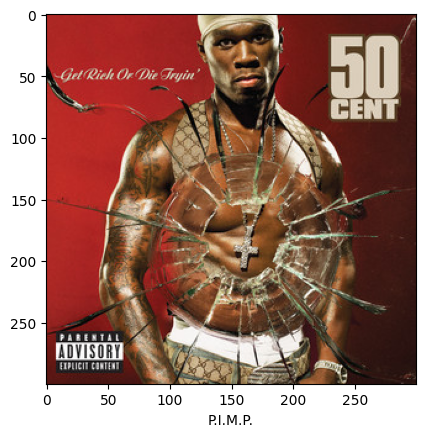

In [52]:
# na API
track = sp.track(id)  # Acessa os dados da música
url = track["album"]["images"][1]["url"]  # Acessa a URL da imagem
name = track["name"]  # Acessa o nome da música

# Mexendo com a imagem
image = io.imread(url)  # Lendo a imagem com o Scikit Image
plt.imshow(image)  # Mostra a imagem
plt.xlabel(name, fontsize=10)
plt.show()

# Recomendador

## Buscando os dados da playlist

In [53]:
def recommend_id(playlist_id): # Função que recebe o ID da playlist e retorna os dados das músicas
    url = []
    name = []
    artists = []
    duracao = []

    for i in playlist_id:
        track = sp.track(i)

        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
        artists.append(track["artists"][0]["name"])
        duracao.append(round(track["duration_ms"] / 60000, 2))

    return name, url, artists, duracao


In [54]:
name, url, artists, duracao = recommend_id(recomendada['id'])

In [55]:
name, url, artists, duracao

(['P.I.M.P.',
  "My Dad's Gone Crazy",
  'Pennyroyal',
  'Hardknock',
  'Am I A Psycho',
  "Still Tippin' (feat. Slim Thug and Paul Wall)",
  'Culón Culito',
  'On To The Next One',
  'You Can Do It',
  "Cleanin' Out My Closet"],
 ['https://i.scdn.co/image/ab67616d00001e02f7f74100d5cc850e01172cbf',
  'https://i.scdn.co/image/ab67616d00001e026ca5c90113b30c3c43ffb8f4',
  'https://i.scdn.co/image/ab67616d00001e02fcd3724fba954e6104e4530d',
  'https://i.scdn.co/image/ab67616d00001e02fcd3724fba954e6104e4530d',
  'https://i.scdn.co/image/ab67616d00001e026a0b17b302637c4094433f09',
  'https://i.scdn.co/image/ab67616d00001e02665aaa39df4e23556453ab93',
  'https://i.scdn.co/image/ab67616d00001e02fcd94be34bef30fb36b0d636',
  'https://i.scdn.co/image/ab67616d00001e02fec1b815bb3c50a64a90fd10',
  'https://i.scdn.co/image/ab67616d00001e023c447d882bd22a69cc6af9da',
  'https://i.scdn.co/image/ab67616d00001e026ca5c90113b30c3c43ffb8f4'],
 ['50 Cent',
  'Eminem',
  'Joey Bada$$',
  'Joey Bada$$',
  'Tech N9

## Gerando as imagens da playlist

In [65]:
def visualize_songs(name, url):  # Função que recebe o nome e a URL das músicas e plota as imagens

    plt.figure(figsize=(15, 10))
    columns = 5

    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)  # Cria os subplots com o número de colunas definido
        image = io.imread(u)  # Lendo a imagem com o Scikit Image
        plt.imshow(image)

        ax.get_yaxis().set_visible(False)  # Remove o eixo y

        plt.xticks(color='w', fontsize=0.1)
        plt.yticks(color='w', fontsize=0.1)
        plt.xlabel(name[i], fontsize=8)  # Adiciona o nome da música como label do eixo x
        plt.tight_layout(h_pad=0.7, w_pad=0)  # Ajusta os parâmetros de layout da imagem.

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        plt.tick_params(bottom=False)  # Remove os ticks do eixo x
        plt.grid(visible=None)  # Remove as linhas de grade
    plt.show()


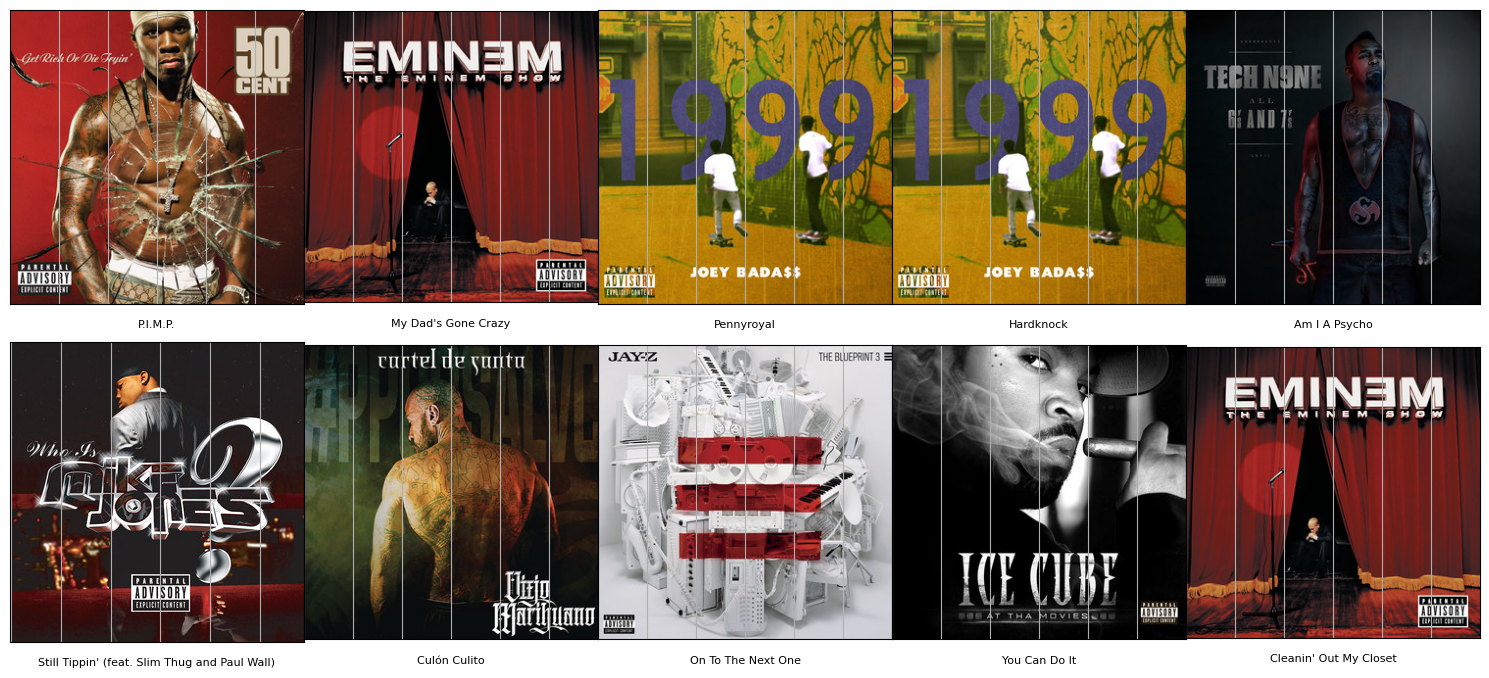

In [66]:
visualize_songs(name, url)

## Fazendo uma função final

In [67]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()


In [90]:
nome_artista = "2Pac" # Nome da música atual

# Busca a musica por partes da string do nome
dados[dados['artists'].str.contains(nome_artista)]

valence  year  acousticness artists  danceability  duration_ms  energy  \
359      0.893  2002       0.29900    2Pac         0.703       247600   0.639   
624      0.663  2004       0.09640    2Pac         0.794       238053   0.614   
986      0.765  2007       0.02920    2Pac         0.761       284480   0.847   
1063     0.316  2007       0.04040    2Pac         0.865       268960   0.657   
3177     0.620  2001       0.01810    2Pac         0.875       244933   0.723   
3199     0.375  2001       0.02670    2Pac         0.757       266507   0.706   
3225     0.804  2001       0.15900    2Pac         0.897       223973   0.815   
3258     0.635  2002       0.08760    2Pac         0.752       257627   0.735   
3338     0.783  2002       0.29400    2Pac         0.839       306200   0.736   
3377     0.629  2003       0.04670    2Pac         0.545       231987   0.796   
3547     0.723  2004       0.11600    2Pac         0.908       203520   0.573   
5575     0.446  2001       0.03290    2Pac         0.870       255627   0.855   
5590     0.743  2001       0.16400    2Pac         0.802       235333   0.792   
5653     0.232  2002       0.05440    2Pac         0.763       322573   0.565   
5669     0.833  2002       0.07480    2Pac         0.615       174267   0.637   
5948     0.570  2004       0.06720    2Pac         0.748       230493   0.614   
5955     0.742  2004       0.01380    2Pac         0.824       288080   0.881   
8363     0.849  2006       0.12800    2Pac         0.772       217440   0.891   
8390     0.398  2006       0.06340    2Pac         0.536       267813   0.836   
8491     0.382  2007       0.16400    2Pac         0.726       312080   0.651   
9930     0.630  2001       0.02740    2Pac         0.707       209800   0.654   
9974     0.726  2001       0.19100    2Pac         0.807       266800   0.786   
10082    0.707  2002       0.00766    2Pac         0.941       169600   0.721   
10149    0.809  2003       0.23800    2Pac         0.843       256693   0.804   
11915    0.891  2001       0.17600    2Pac         0.750       262493   0.834   
12032    0.720  2002       0.72200    2Pac         0.556       252507   0.428   
12145    0.551  2003       0.16700    2Pac         0.750       257453   0.863   
12463    0.817  2007       0.03910    2Pac         0.710       246147   0.905   
14305    0.623  2007       0.15700    2Pac         0.525       263280   0.836   
15780    0.687  2004       0.28300    2Pac         0.874       230227   0.640   
16020    0.704  2007       0.65700    2Pac         0.731       252293   0.417   
16058    0.317  2007       0.03920    2Pac         0.864       268960   0.686   
17338    0.685  2001       0.01100    2Pac         0.923       239573   0.811   
18781    0.798  2001       0.04740    2Pac         0.885       319933   0.560   
18931    0.758  2003       0.34000    2Pac         0.566       304253   0.843   

       explicit                      id  instrumentalness  key  liveness  \
359           1  3eBBbAEBQdr6tkUUd8gyuQ          0.000000    5    0.1390   
624           1  7jLbTp3qZzah9kMIdW8e5M          0.000000    5    0.0788   
986           1  3djNBlI7xOggg7pnsOLaNm          0.000002    7    0.3900   
1063          1  00i2HU7TEzzftShjRrDSEF          0.000000    7    0.1400   
3177          1  7k4dnllwnFDizWHAWkYXsh          0.000000    6    0.3270   
3199          1  5avQSAKB1dOEeIQBqV4jgW          0.000000    8    0.1970   
3225          1  6vBMMa2erexusV4XrgXea9          0.000000   10    0.0637   
3258          1  5dRCujBQZQq6dlkCaGDMV0          0.000000    1    0.1400   
3338          1  4mfc9g4VHf8e7mVLiPEsrq          0.000000    4    0.3390   
3377          1  1ZlVEstPFrKs3alKIejN6I          0.000287   10    0.1650   
3547          1  3iNzFuZPs4va5EUrpAFiYt          0.000547    1    0.0926   
5575          1  7tUw8Zf8a0OcCzU1MwZHOY          0.000001    5    0.1030   
5590          1  1MruDoJ6IXqy9ar20xfKVx          0.000001    6    0.2410   
5653          1  2qcllSUyD

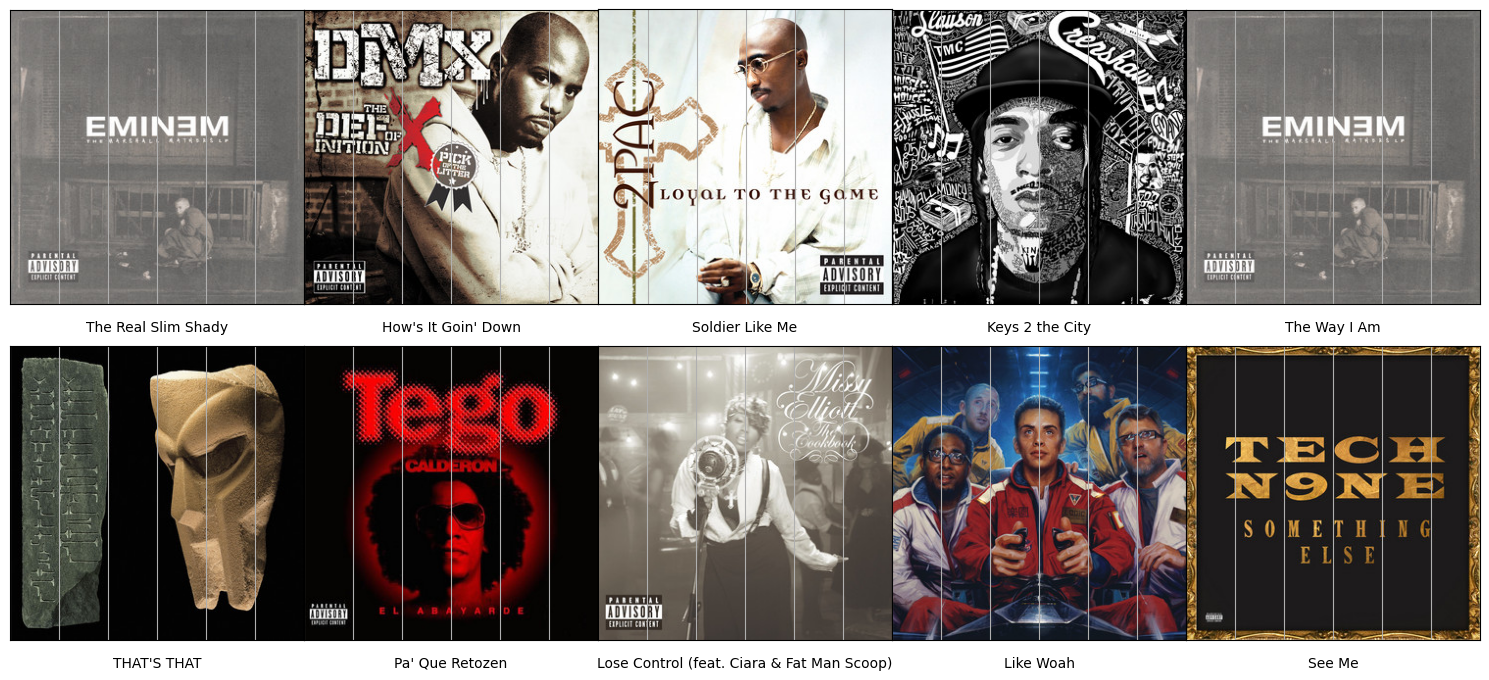

In [74]:
recomendador("Eminem - The Real Slim Shady")

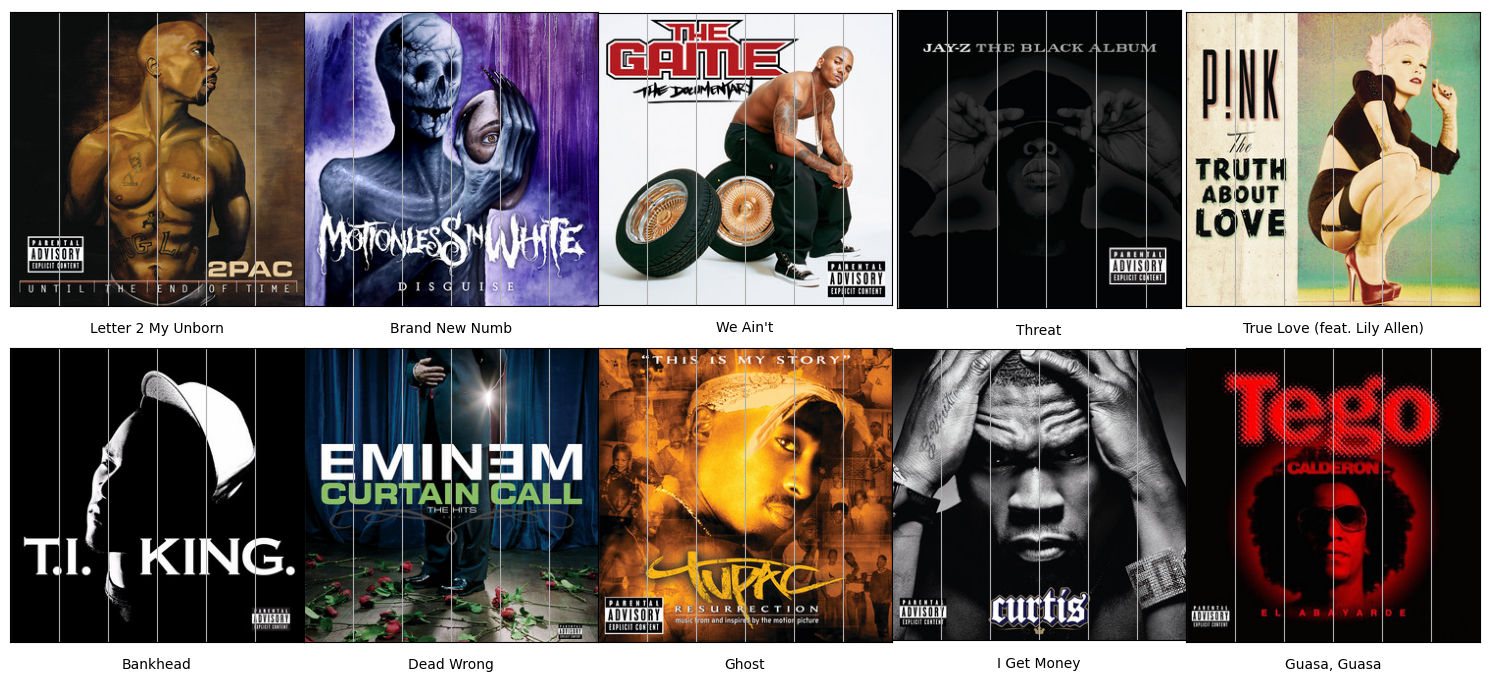

In [91]:
recomendador("2Pac - Letter 2 My Unborn")